### Anotaciones

* _holiday_ incluye a _shops closed_
* trabajar con la fecha

## Carga de librerías

In [289]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Visualización de datos

In [290]:
# Generamos un dataframe del dataset de entrenamiento
df =  pd.read_csv('train.csv')
df.head(5)

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


### Primeros vistazos al dataset original

In [291]:
print(f"El maximo de numero de ordenes en un dia es: {df.orders.max()}")

El maximo de numero de ordenes en un dia es: 18139.0


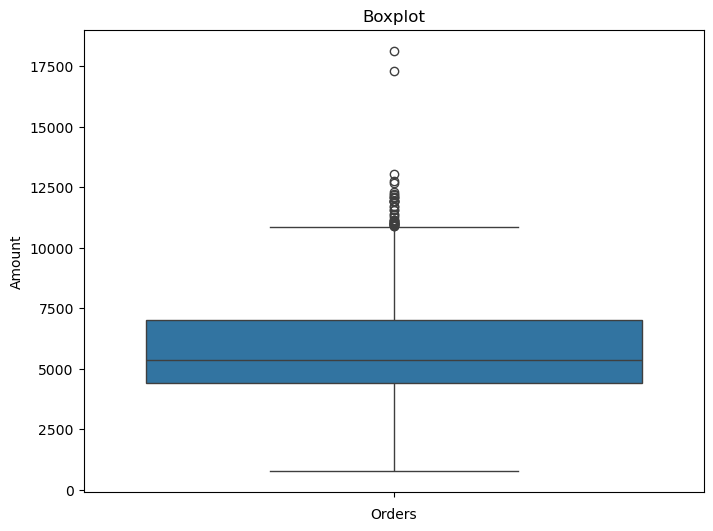

In [292]:
# Boxplot de la cantidad de apariciones de cada numero de ordenes por dia

# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

In [293]:
df.count()

warehouse                 7340
date                      7340
orders                    7340
holiday_name               218
holiday                   7340
shutdown                  7340
mini_shutdown             7340
shops_closed              7340
winter_school_holidays    7340
school_holidays           7340
blackout                  7340
mov_change                7340
frankfurt_shutdown        7340
precipitation             7070
snow                      7070
user_activity_1           7340
user_activity_2           7340
id                        7340
dtype: int64

In [294]:
df.warehouse.value_counts()

warehouse
Prague_1       1193
Brno_1         1193
Prague_2       1193
Prague_3       1193
Budapest_1     1154
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [295]:
df.shops_closed.value_counts()

shops_closed
0    7260
1      80
Name: count, dtype: int64

In [296]:
df[df.warehouse == 'Frankfurt_1'].count()

warehouse                 629
date                      629
orders                    629
holiday_name                6
holiday                   629
shutdown                  629
mini_shutdown             629
shops_closed              629
winter_school_holidays    629
school_holidays           629
blackout                  629
mov_change                629
frankfurt_shutdown        629
precipitation             626
snow                      626
user_activity_1           629
user_activity_2           629
id                        629
dtype: int64

In [297]:
df.frankfurt_shutdown.value_counts()

frankfurt_shutdown
0    7338
1       2
Name: count, dtype: int64

Podemos ver que de las 7340 muestras que tenemos disponibles, solo dos tienen positivo en la columna frankfurt_shutdown, lo que significa que muy posiblemente no tenga relevancia en la variable target y que sera de poca utilidad para el entrenamiento de los modelos predictores.

### Visualizaciones de variaciones del dataset

Para poder obtener mayor informacion -mas precisa y mas util- respecto de los datos disponibles debemos hacer modificaciones al dataset que nos permitan estudiarlo mejor.

La primera modificación tiene que ver con las variables que no se encuentran en el dataset de test. Estas hay que quitarlas para así entrenar modelos con únicamente con las mismas variables que luego se encuentren en el dataset de test. Entonces usaremos este nuevo datagram para visualizar datos y para entrenar a los modelos.

In [298]:
df_clean = df.drop(columns=["shutdown", "mini_shutdown", "frankfurt_shutdown", "precipitation", "snow", "user_activity_1", "user_activity_2", "blackout", "mov_change"])
df_clean.head(5)

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09


Mostramos la correlacion entre las variables numericas y el numero de ordenes por día y sucursal. Para eso debemos quitar todas las variables no númericas

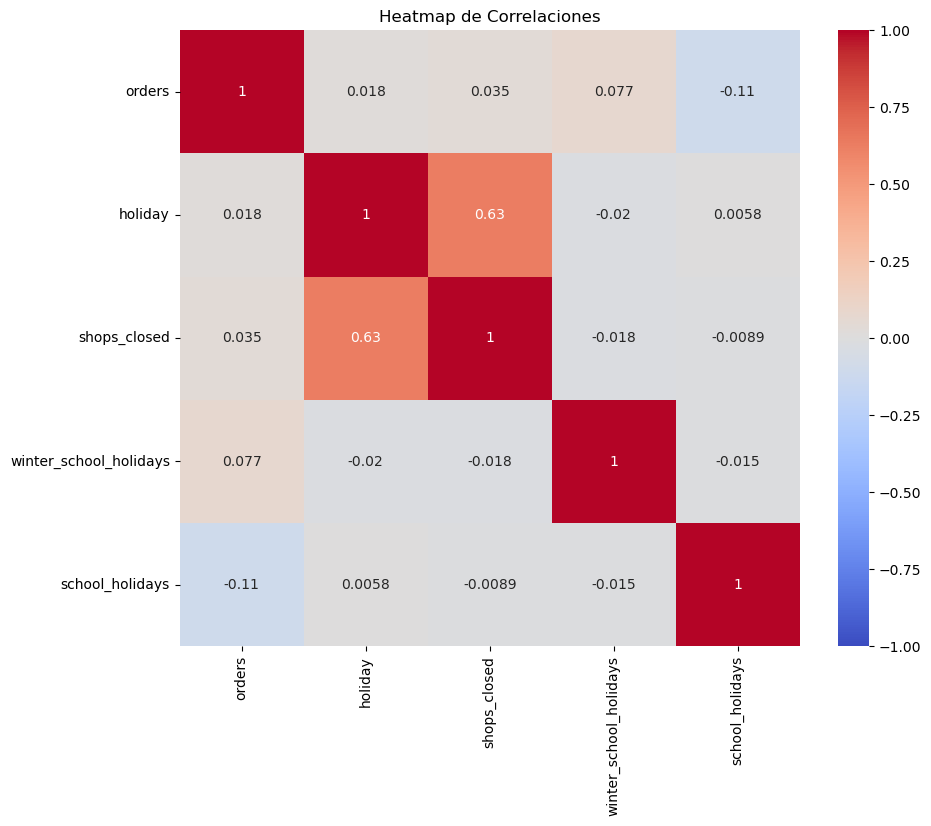

In [299]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'id', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean_numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Otra distinción que tenemos es la de separar los días en si fueron feriado/vacaciones o no.

In [300]:
# Dividimos el dataset en los que son feriados/vacaciones y en los que no
df_holiday = df[df.holiday == 1]
df_no_holiday = df[df.holiday == 0]

Mostramos el Boxplot de cada uno

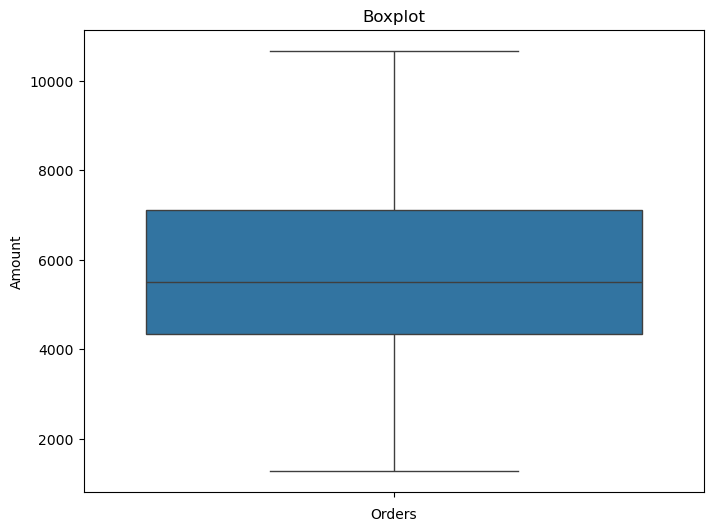

In [301]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

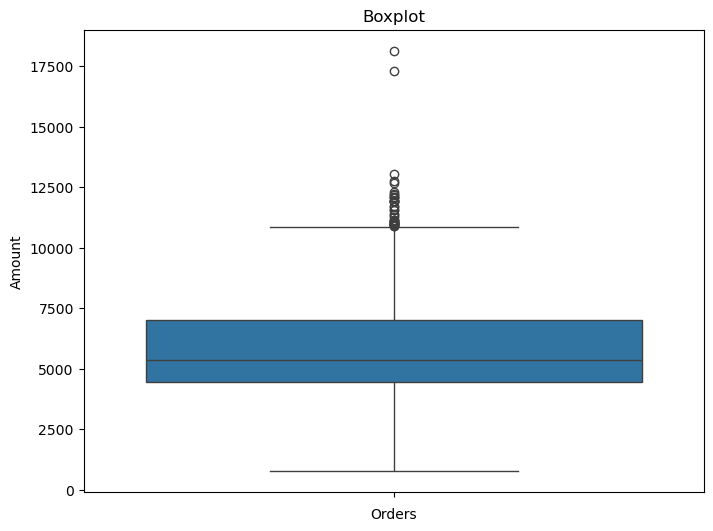

In [302]:
# Crear el boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='orders', data=df_no_holiday)

# Mostrar el gráfico
plt.title('Boxplot')
plt.xlabel('Orders')
plt.ylabel('Amount')
plt.show()

Claramente la sucursal es un factor determinante en las muestras. Queremos ver que tanta correlacion tiene cada sucursal respecto al valor de la variable target. Para eso hacemos variables dummies con la columna warehouse y hacemos un heatmap de correlaciones.

In [303]:
# user activity 1
df_usact1 = df[["user_activity_1"]]
df_usact1[["warehouse"]] = df_clean[["warehouse"]]
df_usact1 = df_usact1.groupby("warehouse")["user_activity_1"].mean().reset_index()
df_clean["user_activity_1"] = pd.merge(df_clean, df_usact1, on="warehouse", how="inner")["user_activity_1"]

# user activity 2
df_usact2 = df[["user_activity_2"]]
df_usact2[["warehouse"]] = df_clean[["warehouse"]]
df_usact2 = df_usact2.groupby("warehouse")["user_activity_2"].mean().reset_index()
df_clean["user_activity_2"] = pd.merge(df_clean, df_usact2, on="warehouse", how="inner")["user_activity_2"]
df_clean[["user_activity_1", "user_activity_2"]]

/tmp/ipykernel_13182/1906015879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact1[["warehouse"]] = df_clean[["warehouse"]]
/tmp/ipykernel_13182/1906015879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usact2[["warehouse"]] = df_clean[["warehouse"]]


,user_activity_1,user_activity_2
0,1671.156748,36898.751048
1,1671.156748,36898.751048
2,1671.156748,36898.751048
3,1671.156748,36898.751048
4,1671.156748,36898.751048
...,...,...
7335,2989.061525,22173.545927
7336,2989.061525,22173.545927
7337,2989.061525,22173.545927
7338,2989.061525,22173.545927


In [304]:
# Reemplazamos warehouse por sus variables dummies a la vez que quitamos el resto de variables
df_warehouses = pd.concat([df_clean.drop(["warehouse", "holiday", "holiday_name", 'date', 'id', "shops_closed", "school_holidays", "winter_school_holidays"], axis=1), pd.get_dummies(df_clean.warehouse).astype('int').add_prefix('warehouse_')], axis=1)
df_warehouses

,orders,user_activity_1,user_activity_2,warehouse_Brno_1,warehouse_Budapest_1,warehouse_Frankfurt_1,warehouse_Munich_1,warehouse_Prague_1,warehouse_Prague_2,warehouse_Prague_3
0,6895.0,1671.156748,36898.751048,0,0,0,0,1,0,0
1,6584.0,1671.156748,36898.751048,0,0,0,0,1,0,0
2,7030.0,1671.156748,36898.751048,0,0,0,0,1,0,0
3,6550.0,1671.156748,36898.751048,0,0,0,0,1,0,0
4,6910.0,1671.156748,36898.751048,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
7335,6733.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7336,6492.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7337,6661.0,2989.061525,22173.545927,0,1,0,0,0,0,0
7338,6843.0,2989.061525,22173.545927,0,1,0,0,0,0,0


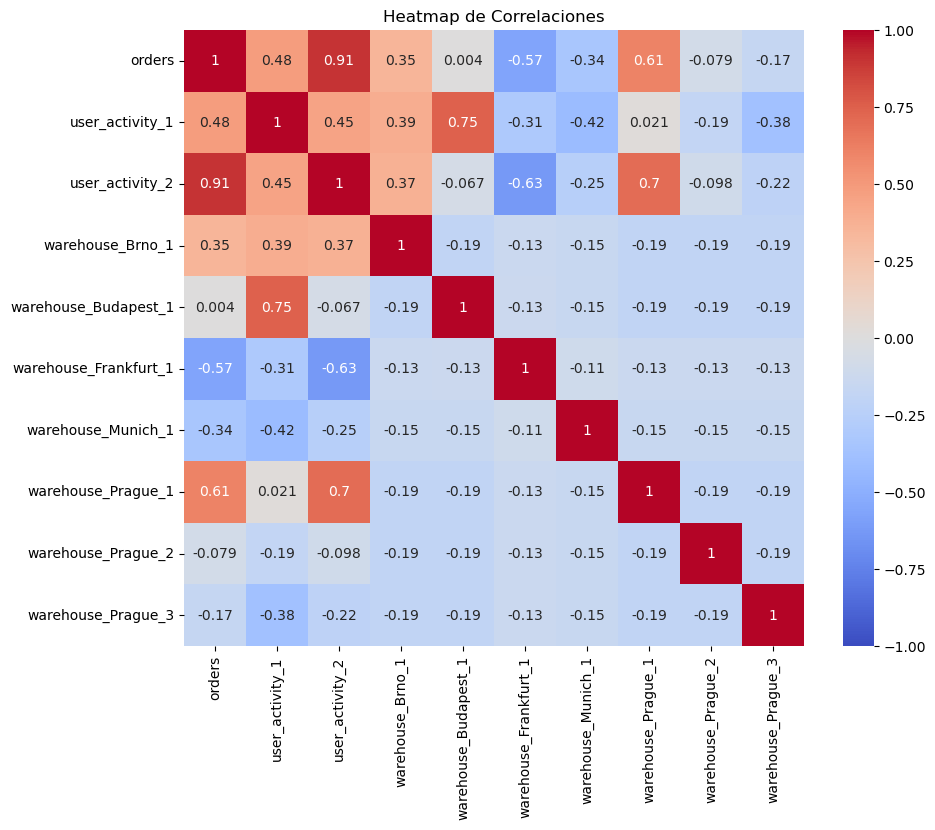

In [305]:
# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_warehouses.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

Notamos que hay mucha correlación entre las sucursales menos en dos (_warehouse Budapest 1_,  _warehouse Prague 2_ y _warehouse Prague 3_), por lo tanto dejamos esas variables como _other_

In [306]:
df_clean["warehouse"] = df_clean["warehouse"].apply(lambda x : "other" if x in ["Budapest_1", "Prague_2", "Prague_3"] else x)
df_clean.warehouse.value_counts()

warehouse
other          3540
Prague_1       1193
Brno_1         1193
Munich_1        785
Frankfurt_1     629
Name: count, dtype: int64

In [307]:
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id,user_activity_1,user_activity_2
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05,1671.156748,36898.751048
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06,1671.156748,36898.751048
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07,1671.156748,36898.751048
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08,1671.156748,36898.751048
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09,1671.156748,36898.751048
...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10,2989.061525,22173.545927
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11,2989.061525,22173.545927
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12,2989.061525,22173.545927
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13,2989.061525,22173.545927


In [308]:
df_clean['fecha'] = pd.to_datetime(df['date'])


In [309]:
df_clean["day_week"] = df_clean.fecha.dt.day_name()

In [310]:
df_clean["month"] = df_clean.fecha.dt.month_name()

In [311]:
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id,user_activity_1,user_activity_2,fecha,day_week,month
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05,1671.156748,36898.751048,2020-12-05,Saturday,December
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06,1671.156748,36898.751048,2020-12-06,Sunday,December
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07,1671.156748,36898.751048,2020-12-07,Monday,December
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08,1671.156748,36898.751048,2020-12-08,Tuesday,December
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09,1671.156748,36898.751048,2020-12-09,Wednesday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10,2989.061525,22173.545927,2024-03-10,Sunday,March
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11,2989.061525,22173.545927,2024-03-11,Monday,March
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12,2989.061525,22173.545927,2024-03-12,Tuesday,March
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13,2989.061525,22173.545927,2024-03-13,Wednesday,March


In [312]:
df_dates_info = pd.concat(
    [df_clean[["orders"]],
     pd.get_dummies(df_clean.day_week).astype('int').add_prefix('day_of_week_')],
    axis=1
)


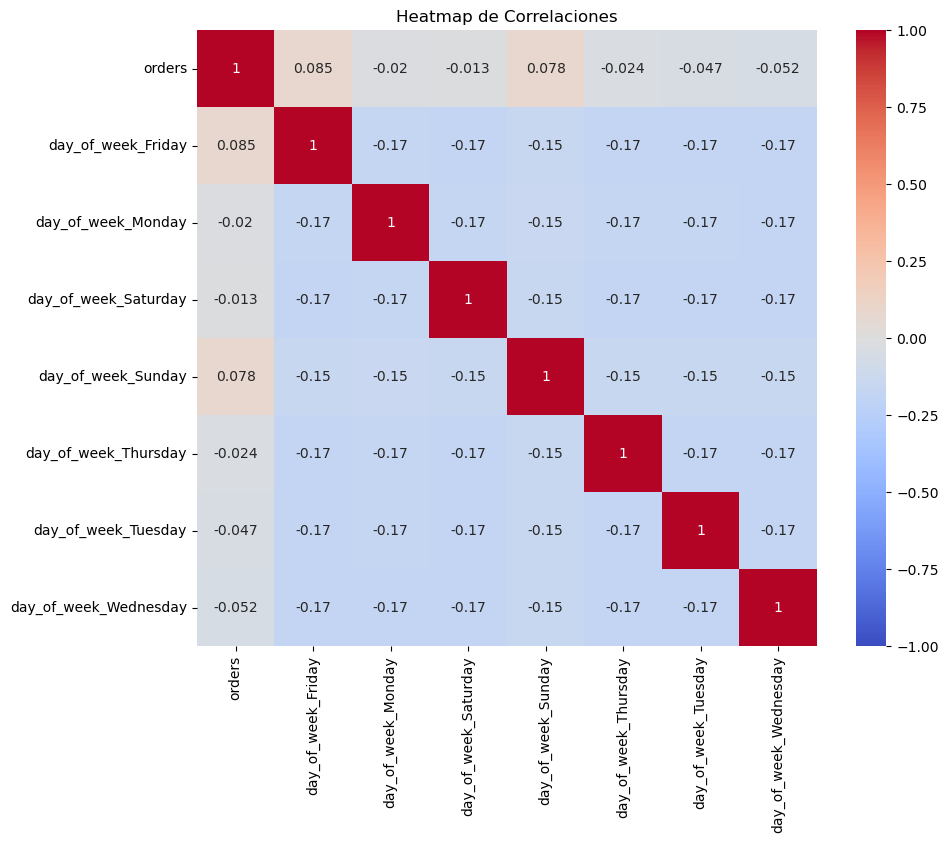

In [313]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'id', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_dates_info.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [314]:
df_month_info = pd.concat(
    [df_clean[["orders"]],
     pd.get_dummies(df_clean.month).astype('int').add_prefix('month_')],
    axis=1
)


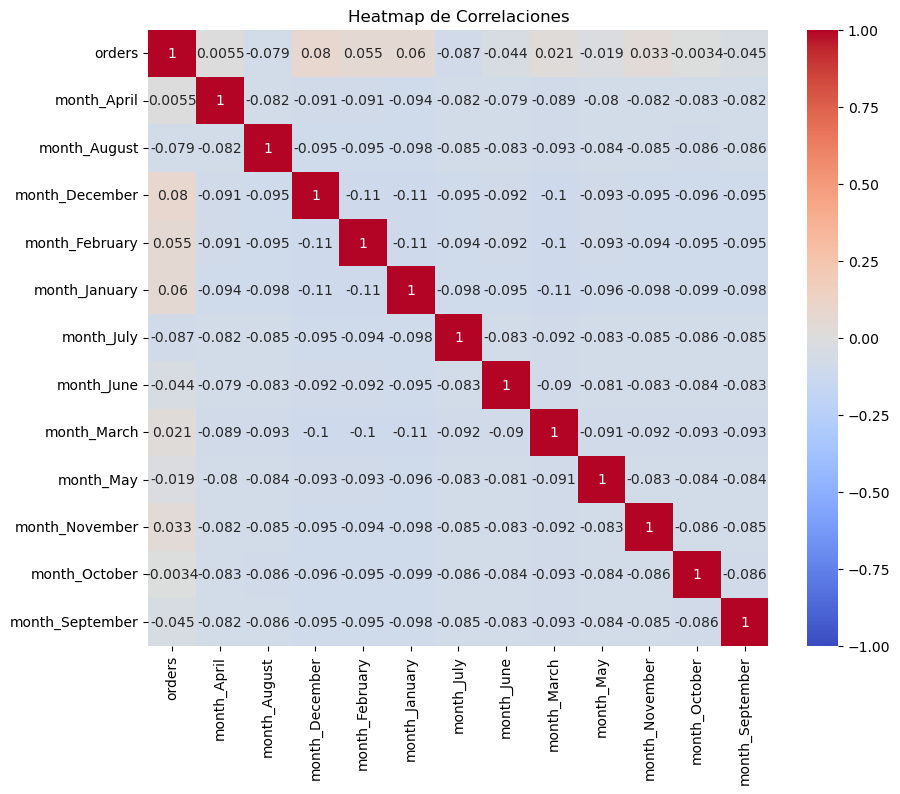

In [315]:
df_clean_numeric = df_clean.drop(columns=['warehouse', 'date', 'id', 'holiday_name'])

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_month_info.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Personalizar el gráfico
plt.title('Heatmap de Correlaciones')
plt.show()

In [316]:
df_dates_info.corr().orders.sort_values(ascending=False)

orders                   1.000000
day_of_week_Friday       0.084853
day_of_week_Sunday       0.078324
day_of_week_Saturday    -0.012561
day_of_week_Monday      -0.019894
day_of_week_Thursday    -0.024097
day_of_week_Tuesday     -0.046829
day_of_week_Wednesday   -0.051775
Name: orders, dtype: float64

In [317]:
df_clean["combination"] = df_clean.day_week + df_clean.month

In [318]:
df_combination_info = pd.concat(
    [df_clean[["orders"]],
     pd.get_dummies(df_clean.combination).astype('int').add_prefix('combination_')],
    axis=1
)


In [319]:
df_combination_info.corr().orders.sort_values(ascending=False)

orders                        1.000000
combination_FridayFebruary    0.052836
combination_FridayDecember    0.051613
combination_FridayJanuary     0.048161
combination_SundayDecember    0.042315
                                ...   
combination_TuesdayJuly      -0.035263
combination_SaturdayAugust   -0.039892
combination_ThursdayJuly     -0.040485
combination_SaturdayJuly     -0.040649
combination_WednesdayJuly    -0.041328
Name: orders, Length: 85, dtype: float64

In [320]:
df_clean

,warehouse,date,orders,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id,user_activity_1,user_activity_2,fecha,day_week,month,combination
0,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,Prague_1_2020-12-05,1671.156748,36898.751048,2020-12-05,Saturday,December,SaturdayDecember
1,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,Prague_1_2020-12-06,1671.156748,36898.751048,2020-12-06,Sunday,December,SundayDecember
2,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,Prague_1_2020-12-07,1671.156748,36898.751048,2020-12-07,Monday,December,MondayDecember
3,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,Prague_1_2020-12-08,1671.156748,36898.751048,2020-12-08,Tuesday,December,TuesdayDecember
4,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,Prague_1_2020-12-09,1671.156748,36898.751048,2020-12-09,Wednesday,December,WednesdayDecember
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7335,other,2024-03-10,6733.0,NaN,0,0,0,0,Budapest_1_2024-03-10,2989.061525,22173.545927,2024-03-10,Sunday,March,SundayMarch
7336,other,2024-03-11,6492.0,NaN,0,0,0,0,Budapest_1_2024-03-11,2989.061525,22173.545927,2024-03-11,Monday,March,MondayMarch
7337,other,2024-03-12,6661.0,NaN,0,0,0,0,Budapest_1_2024-03-12,2989.061525,22173.545927,2024-03-12,Tuesday,March,TuesdayMarch
7338,other,2024-03-13,6843.0,NaN,0,0,0,0,Budapest_1_2024-03-13,2989.061525,22173.545927,2024-03-13,Wednesday,March,WednesdayMarch
